___

# Exploratory Data Analysis of the Relationships, Patterns, and Trends between MTA Subway Ridership (2020-2024) & Major Incidents

___

## **Important Background Information**

### _Major Incidents_ 
Major Incidents are occurrences that delay 50 or more trains. These are the most likely to cause the highest about of disruption for MTA Subway Riders.
___
### _The Types of Major Incidents tracked by the MTA include:_ 
- __Track:__ Track incidents have a variety of root causes including low quality maintenance (especially when trains are moving at high speed), mistakes and confusion from train operators (this includes ignoring signals, incorrect breaking, and even speeding)
- __Persons on Trackbed/Police/Medical__
- __Signals:__ The various types Signals in the MTA Subway System are manually operated by human operators in signal towers, not automatically by the trains themselves. They are meant to prevent track divergences, control train speed, maintain safe train operation around curves, detect issues with wheels and more. The infrastructure of the MTA Subway system is severely in need of 21st century upgrades and lags behind most comparable subway infrastructures globally
- __Stations and Structure__
- __Subway Car__
- __Other__

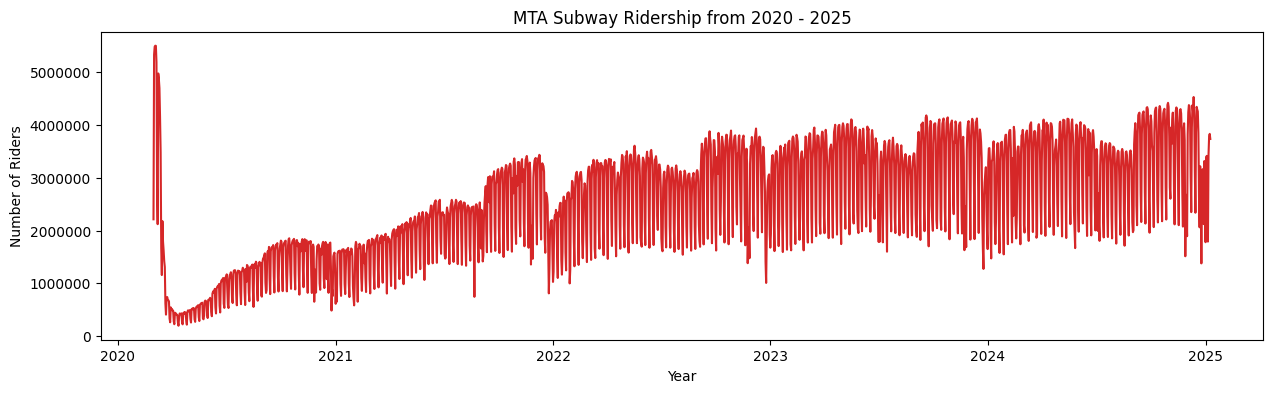

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Read combined_df.csv
dfc = pd.read_csv("/Users/leilastambuli/Documents/Portfolio-Project/combined_df.csv")

#Convert "date" column into datetime object
dfc["date"] = pd.to_datetime(dfc["date"])

#Create function to set up Time Series Visualization
def plot_dfc(dfc, x, y, title="", xlabel='Year', ylabel='Number of Riders', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) 
    plt.show()
    
#Plot time series visualization using the date and subways_total_estimated_ridership columns
plot_dfc(dfc, x=dfc['date'], y=dfc['subways_total_estimated_ridership'], title='MTA Subway Ridership from 2020 - 2025')


### _Insights Regarding Overall Annual MTA Subway Ridership from 2020 to January 2025_

__Chart Info:__ This time series visualization shows the MTA Ridership by year from 2020 to 2024, including one month of ridership data from January 2025. 

As was expected, there is a steep drop in ridership from 2020 to 2021 due to the Pandemic. With schools and most businesses closed, most major events cancelled, and low to non-existent tourism combined with adherence to lockdown policies that limited train availability (among many other factors), the glaring difference between 2020 ridership and ridership from the proceeding years is no surprise.

From 2021 onward, MTA Subway ridership gradually increases over time, but even as of January 2025 - ridership still has yet to reach pre-Pandemic levels.

<Figure size 5500x2300 with 0 Axes>

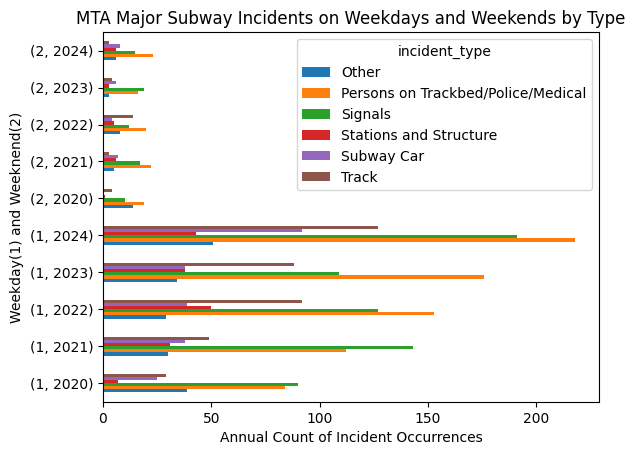

<Figure size 5500x2300 with 0 Axes>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Read the incidents.csv file
dfi = pd.read_csv("/Users/leilastambuli/Documents/Portfolio-Project/incidents.csv")

#Convert "date" column into datetime object then extract the year only
dfi["date"] = pd.to_datetime(dfi["date"])
dfi["year"] = dfi["date"].dt.year

#Pivot the data from the dfi dataframe
pivot_dfi = dfi.pivot_table(index=["wday_wnd", "year"], columns="incident_type", values="incident_count", aggfunc="sum").plot.barh()

#Customize x and y labels, tick values of x & y axes
plt.gca().set(title="MTA Major Subway Incidents on Weekdays and Weekends by Type", xlabel="Annual Count of Incident Occurrences", ylabel="Weekday(1) and Weeknend(2)")

#Increase figure size
plt.figure(figsize=(55, 23))

___

### _Insights/Analysis_
___

- This grouped bar graph measures the annual count of incident occurrences, grouped by respective year and whether they happened on weekday [1] or weekend [2].

- The Weekdays host more incident occurrences overall as there are, on average, more riders during the weekday - creating more opportunity for accidents and incidents to happen.

- The most frequently occurring incident regardless of weekday/weekend or year = Persons on Trackbed/Police/Medical, followed by Signal incidents, then Track incidents.


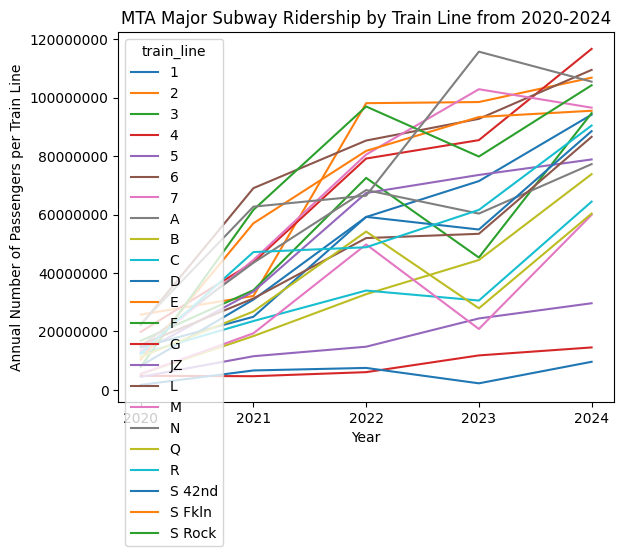

<Figure size 7500x4000 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Read merged_file.csv
dft = pd.read_csv("/Users/leilastambuli/Documents/Portfolio-Project/merged_file.csv")

#Convert "date" column into datetime object then extract the year
dft["date"] = pd.to_datetime(dft["date"])
dft["year"] = dft["date"].dt.year

#Pivot the data from the dft dataframe
pivot_dft = dft.pivot_table(index=["year"], columns="train_line", values="subways_total_estimated_ridership", aggfunc="sum").plot.line()

#Remove scientific notation from y axis
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) 

#Change year format of x axis to remove unwanted decimal points
plt.xticks([2020, 2021, 2022, 2023, 2024])

#Customize x and y labels, tick values of x & y axes
plt.gca().set(title="MTA Major Subway Ridership by Train Line from 2020-2024", xlabel="Year", ylabel="Annual Number of Passengers per Train Line")

#Increase figure size, add constrained layout for readability 
plt.figure(figsize=(75, 40), constrained_layout=True)



MTA Subway Train Lines are divided into the A Division and the B Division

## **A DIVISION:** 
The A Division includes only numbered trains in the MTA Subway System. (Train Lines: 1, 2, 3, 4, 5, 6, 7)
- These train cars are narrower and shorter than those of the B Division
- Numbered trains have less capacity than B Division trains due to being smaller

## **B DIVISION**
The B Division includes lettered trains and 2 shuttles (Franklin Ave shuttle and Rockaway Park shuttle) 

The B Division Train Lines are as follows: A, B, C, D, E, F, G, J, L, M, N, Q, R, W, and Z & the Franklin Ave and Rockaway Park Shuttles
- B  Division trains are larger, wider, and heavier than A Division trains
- B Division train lines cover more locations across Manhattan, The Bronx, Brooklyn, and Queens

## **Analysis/Insights**
All trains lines experienced an sharp decrease in ridership in 2020.

Annual Ridership does take a drop for B Division train in 2023.

Overall ridership for all train lines has increased by 2024, but none have returned to their pre-2020 amounts.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Read merged_file.csv
dfd = pd.read_csv("/Users/leilastambuli/Documents/Portfolio-Project/merged_file.csv")

#Convert "date" column into datetime object then extract the year
dfd["date"] = pd.to_datetime(dfd["date"])
dfd["year"] = dfd["date"].dt.year

#Convert train_line column from object dtype to category dtype
dfd.train_line = dfd.train_line.astype("category")

#Drop the wday_wnd, date and incident_type columns
dfd.drop(columns=["incident_type", "wday_wnd", "date"], inplace=True)

#Set year column to datetime object from int after removal of old "date" column
dfd["year"] = pd.to_datetime(dfd["year"], format="%Y")
dfd["year"] = dfd["year"].dt.year

#Get totals of incident_count grouped by year
dfd.groupby("year")[["subways_total_estimated_ridership", "incident_count"]].sum()


subways_total_estimated_ridership  incident_count
year                                                   
2020                          262607558             250
2021                          735488866             463
2022                         1215035129             553
2023                         1251524185             534
2024                         1665035187             783

Incident count overall has increased every year since 2020.